In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Reading the File

In [2]:
lyde = pd.read_csv("lyde_with_avg_temp.csv")

# Understanding the  Data

In [3]:
lyde.shape

(658390, 16)

In [4]:
lyde.head(10)

,source,survey,year,bio_year,latitude,longitude,state,lyde_present,lyde_established,lyde_density,source_agency,collection_method,pointID,rounded_longitude_10k,rounded_latitude_10k,avg_temp
0,inat,iNAT_20211217,2015,2015,40.414414,-75.658824,PA,True,False,Unpopulated,iNaturalist,individual_reporting,0d5b01ed-46da-451f-a0b5-8d091dc7306a,-75.647059,40.450450,49.5
1,inat,iNAT_20211217,2016,2016,40.333333,-75.635294,PA,True,False,Unpopulated,iNaturalist,individual_reporting,05e0522c-0281-4daf-896b-81d00309a893,-75.647059,40.360360,50.9
2,inat,iNAT_20211217,2016,2016,40.360360,-75.482353,PA,True,False,Unpopulated,iNaturalist,individual_reporting,2e6ebafb-67fb-43d8-8c7a-15818e38812c,-75.529412,40.360360,50.9
3,inat,iNAT_20211217,2016,2016,40.369369,-75.623529,PA,True,False,Unpopulated,iNaturalist,individual_reporting,bcdc8ef7-936a-4738-a370-87b58bccb06f,-75.647059,40.360360,50.9
4,inat,iNAT_20211217,2016,2016,40.378378,-75.717647,PA,True,False,Unpopulated,iNaturalist,individual_reporting,908a6479-1768-4646-9b81-24d3cda154ca,-75.764706,40.360360,50.9
5,inat,iNAT_20211217,2016,2016,40.477477,-75.623529,PA,True,False,Unpopulated,iNaturalist,individual_reporting,f307ab63-aa07-47d9-a7a9-e08cce5db93b,-75.647059,40.450450,50.9
6,inat,iNAT_20211217,2016,2016,40.594595,-75.517647,PA,True,False,Unpopulated,iNaturalist,individual_reporting,5ab960e2-e649-41c2-8890-acdc0b4d424e,-75.529412,40.630631,50.9
7,inat,iNAT_20211217,2017,2016,40.387387,-75.658824,PA,True,False,Unpopulated,iNaturalist,individual_reporting,e973e38f-2659-4b35-84f1-91f55b45c25e,-75.647059,40.360360,50.6
8,inat,iNAT_20211217,2017,2016,40.387387,-75.647059,PA,True,False,Unpopulated,iNaturalist,individual_reporting,8839e295-3b16-47ba-807b-0f81c304a21f,-75.647059,40.360360,50.6
9,inat,iNAT_20211217,2017,2017,40.135135,-75.517647,PA,True,False,Unpopulated,iNaturalist,individual_reporting,da72f715-8f81-4d30-b1f9-7e3012d38a01,-75.529412,40.180180,50.6


In [5]:
lyde.dtypes

source                    object
survey                    object
year                       int64
bio_year                   int64
latitude                 float64
longitude                float64
state                     object
lyde_present                bool
lyde_established          object
lyde_density              object
source_agency             object
collection_method         object
pointID                   object
rounded_longitude_10k    float64
rounded_latitude_10k     float64
avg_temp                 float64
dtype: object

<Axes: title={'center': 'state'}>

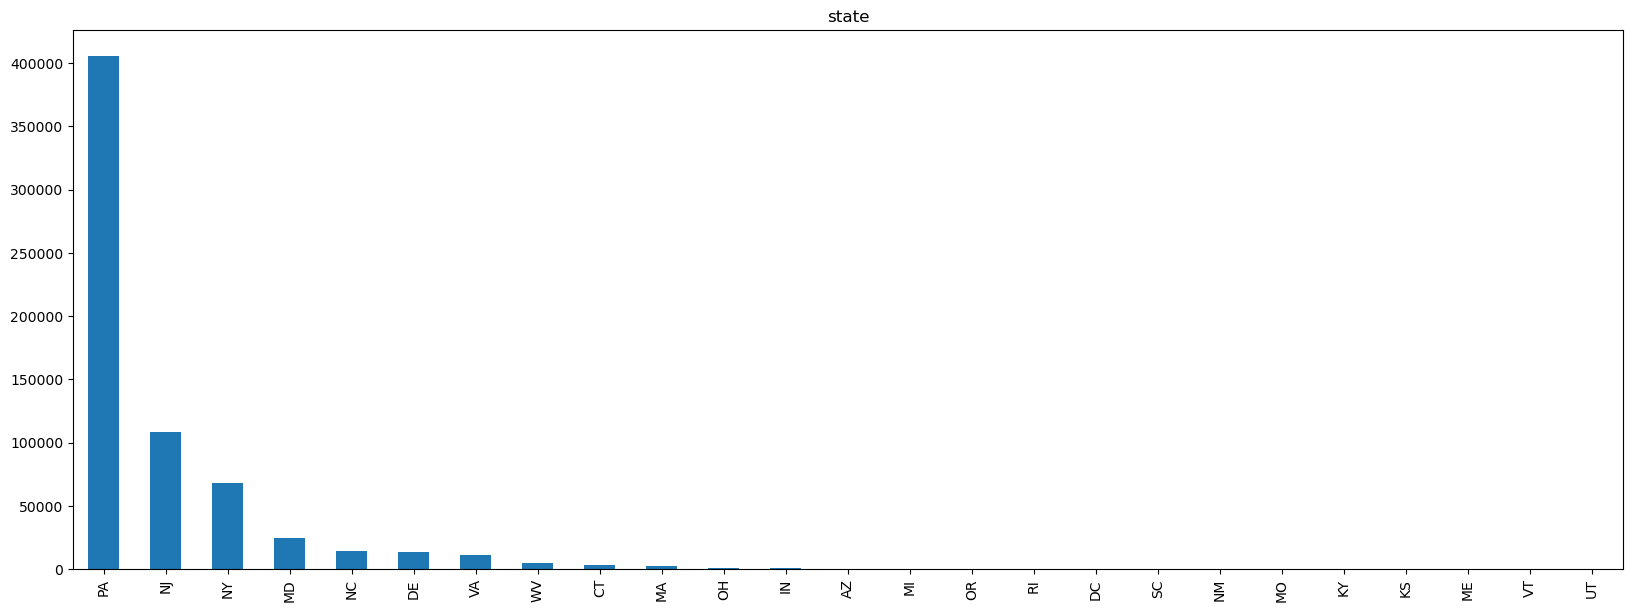

In [6]:
lyde['state'].value_counts().plot.bar(figsize=(20,7),title='state')

<Axes: title={'center': 'Survey'}>

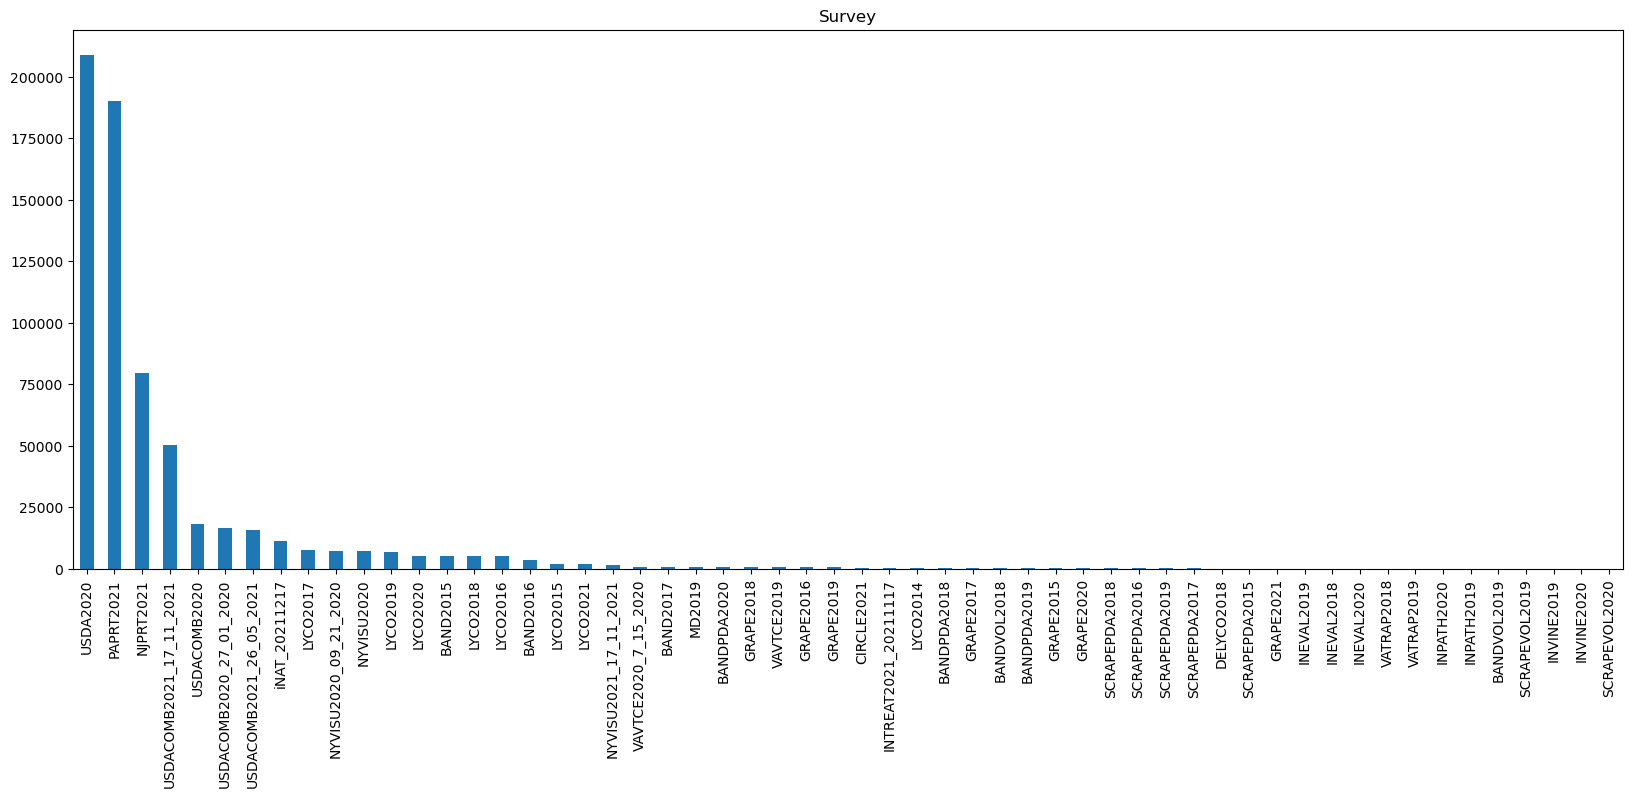

In [7]:
lyde['survey'].unique()
lyde['survey'].value_counts().plot.bar(figsize=(20,7),title='Survey')

<Axes: title={'center': 'year'}>

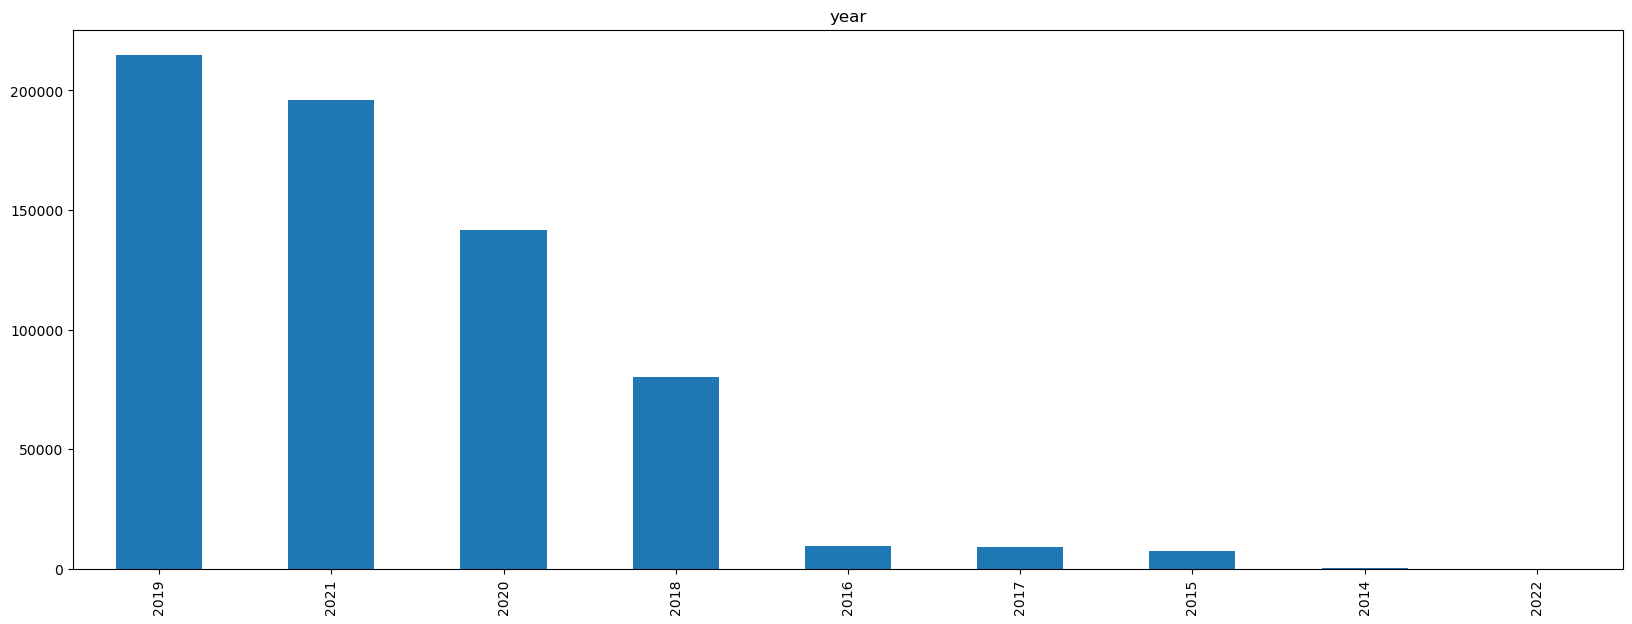

In [8]:
plt.subplot()
lyde['year'].value_counts().plot.bar(figsize=(20,7),title='year')

<Axes: title={'center': 'bio year'}>

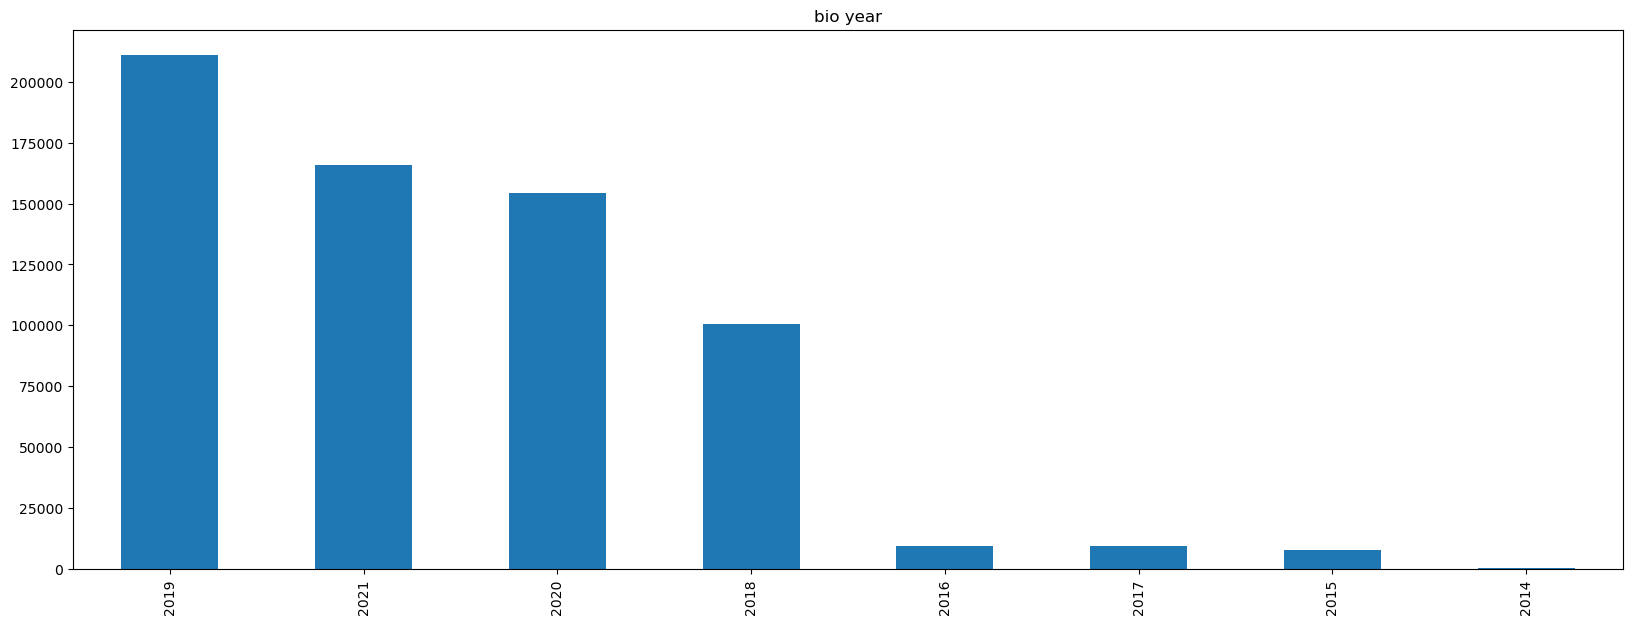

In [9]:
plt.subplot()
lyde['bio_year'].value_counts().plot.bar(figsize=(20,7),title='bio year')

In [10]:
lyde["state"].unique()

array(['PA', 'NJ', 'VA', 'DE', 'MD', 'NY', 'UT', 'MA', 'MI', 'NC', 'WV',
       'CT', 'VT', 'OH', 'IN', 'KY', 'DC', 'SC', 'NM', 'AZ', 'RI', 'OR',
       'MO', 'KS', 'ME'], dtype=object)

<Axes: title={'center': 'Collection Method'}>

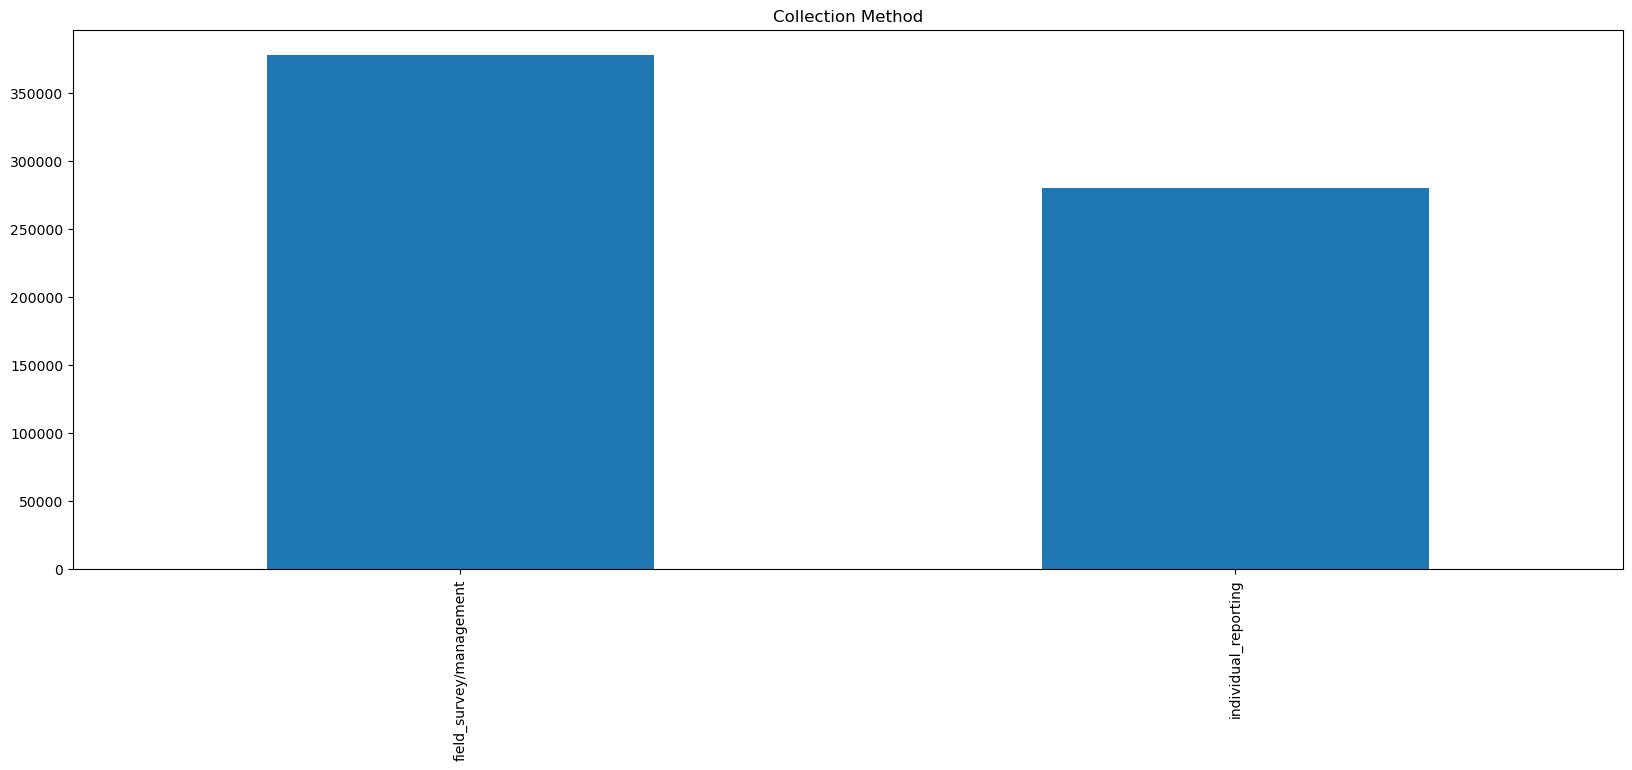

In [11]:
lyde['collection_method'].value_counts().plot.bar(figsize=(20,7),title='Collection Method')

<Axes: title={'center': 'Source'}>

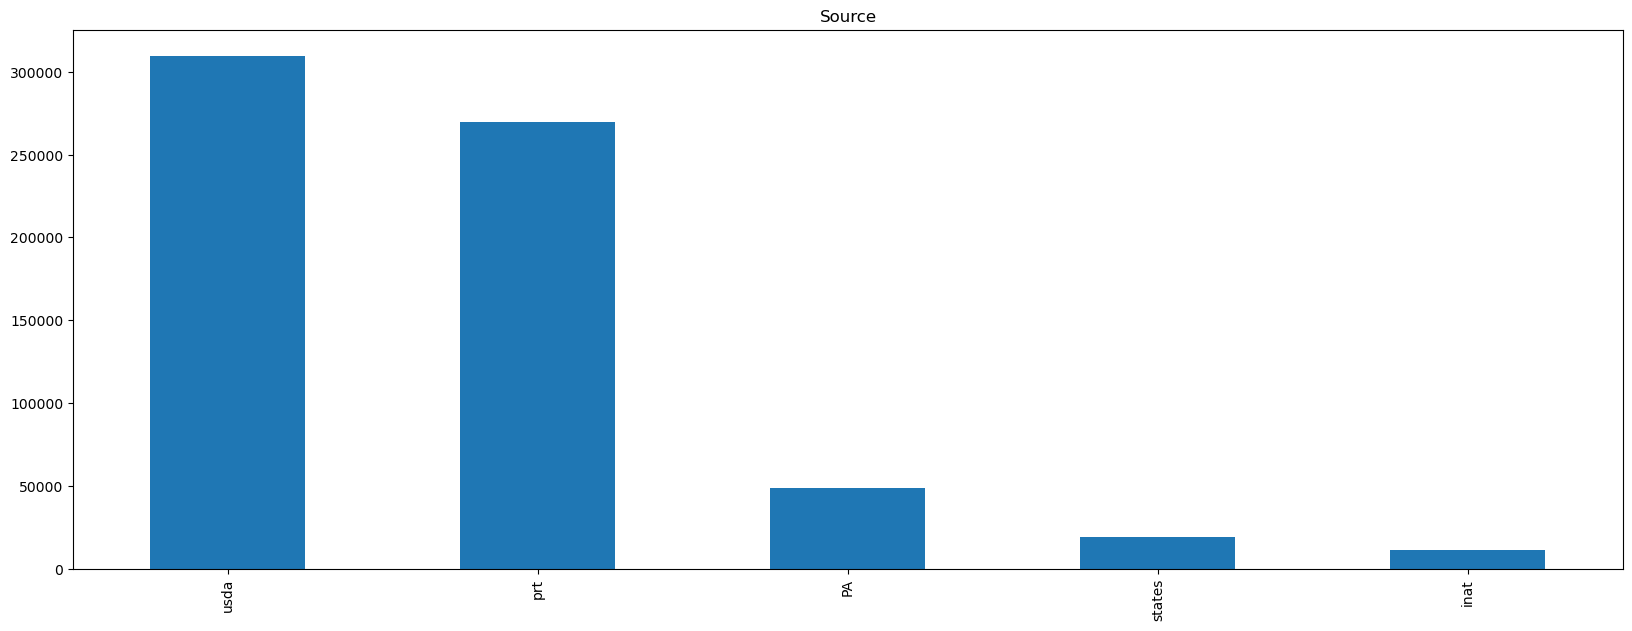

In [12]:
lyde['source'].value_counts().plot.bar(figsize=(20,7),title='Source')

<Axes: title={'center': 'Lyde Present'}>

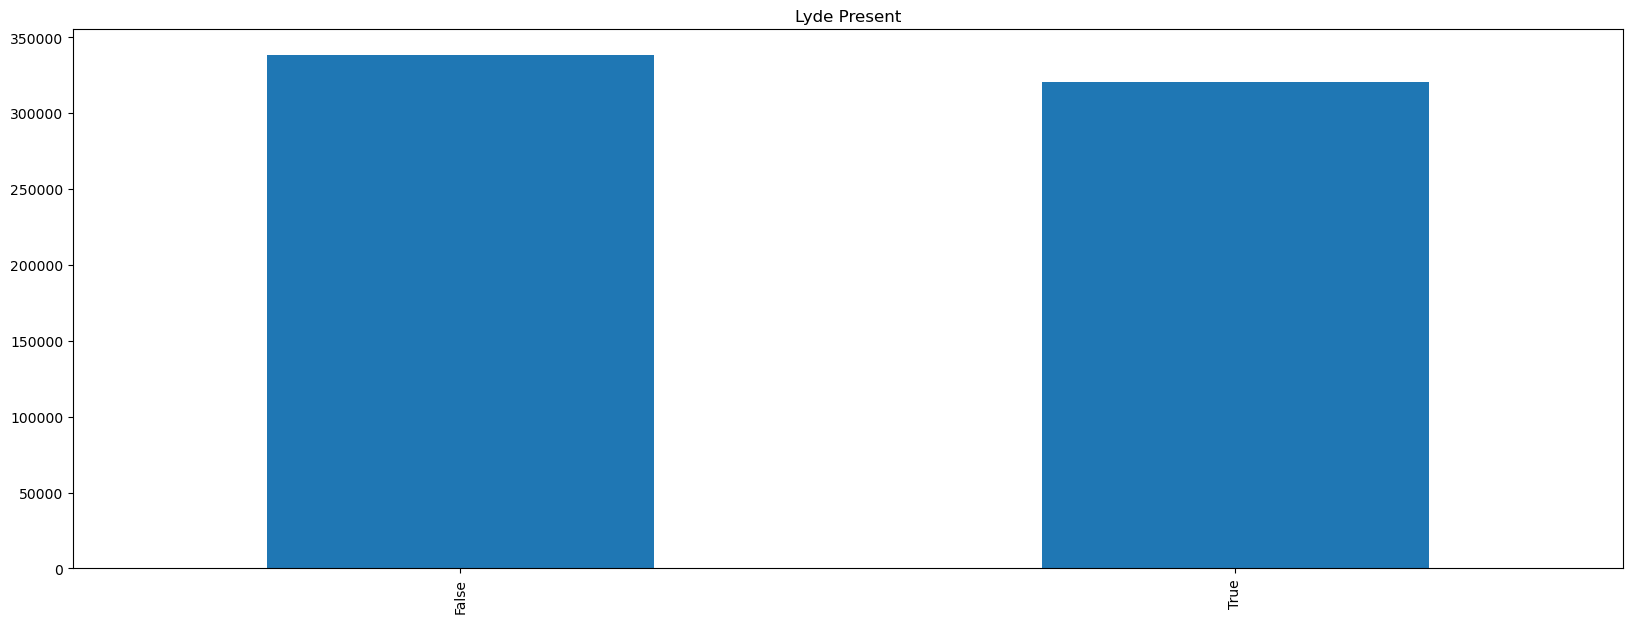

In [13]:
lyde['lyde_present'].value_counts().plot.bar(figsize=(20,7),title='Lyde Present')

<Axes: title={'center': 'Lyde Established'}>

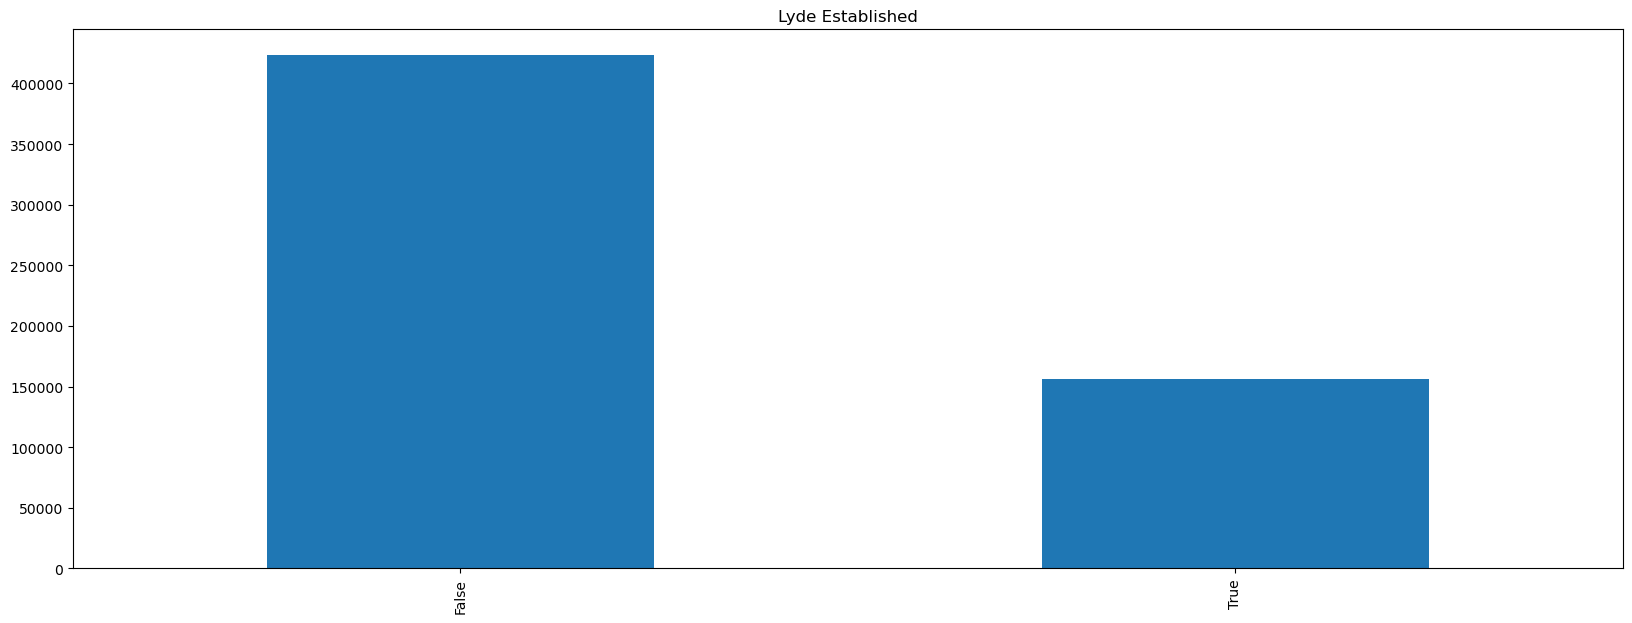

In [14]:
lyde['lyde_established'].value_counts().plot.bar(figsize=(20,7),title='Lyde Established')

<Axes: title={'center': 'Lyde Density Distribution'}>

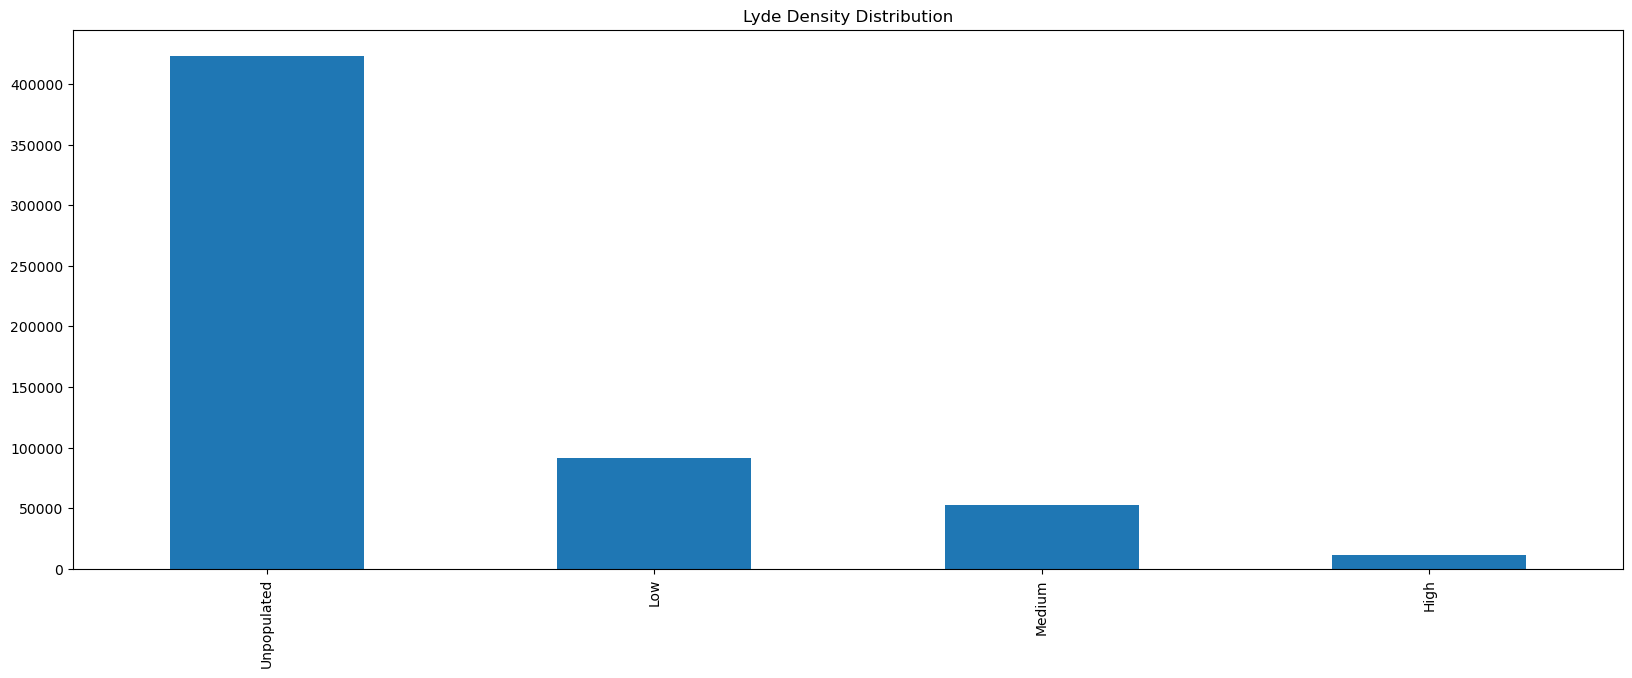

In [15]:
lyde['lyde_density'].value_counts().plot.bar(figsize=(20,7),title='Lyde Density Distribution')

<Axes: title={'center': 'source_agency'}>

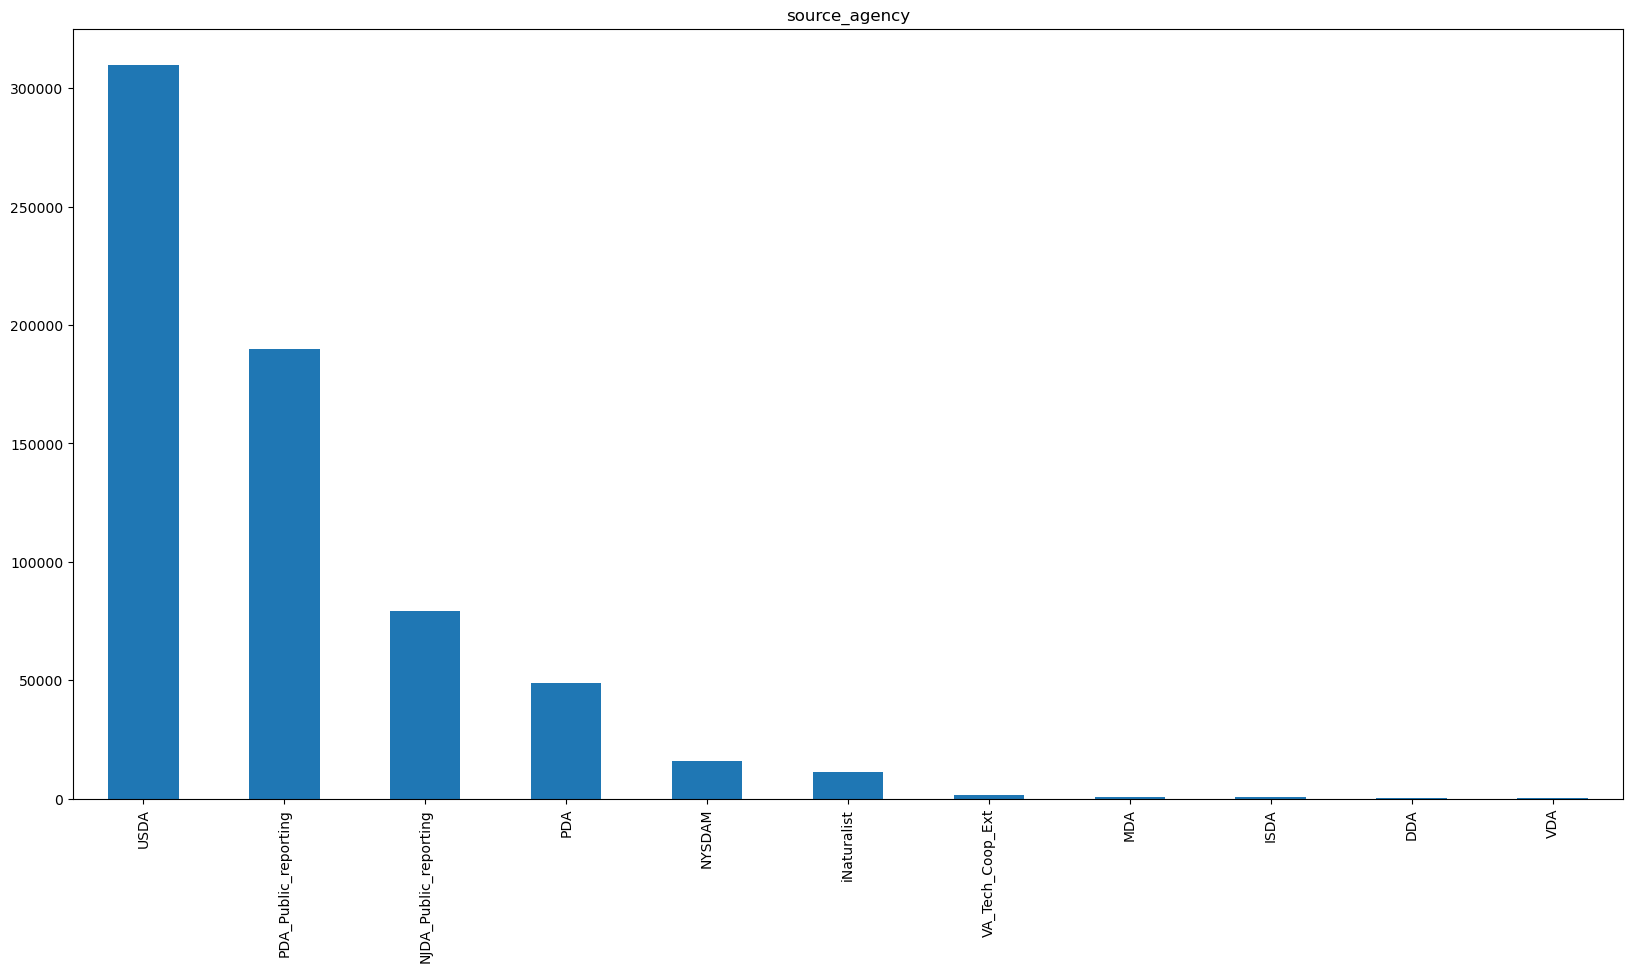

In [16]:
lyde["source_agency"].value_counts()
lyde['source_agency'].value_counts().plot.bar(figsize=(20,10),title='source_agency')

## Timeseries of Data

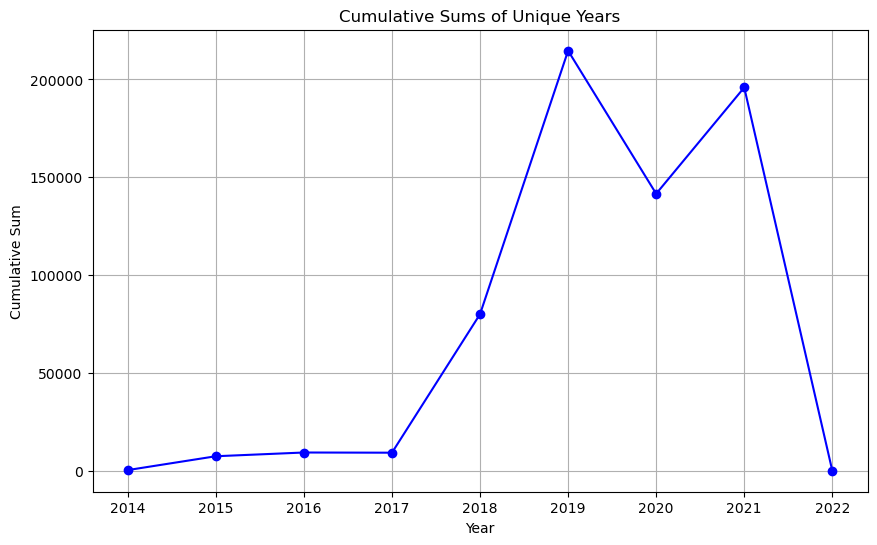

In [17]:

cumulative_sums = lyde.groupby('year').size()

# Creating a time series plot for the cumulative sums of unique years
plt.figure(figsize=(10, 6))  
plt.plot(cumulative_sums.index, cumulative_sums.values, marker='o', linestyle='-', color='b')

plt.title('Cumulative Sums of Unique Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Sum')
plt.grid(True)
plt.show()

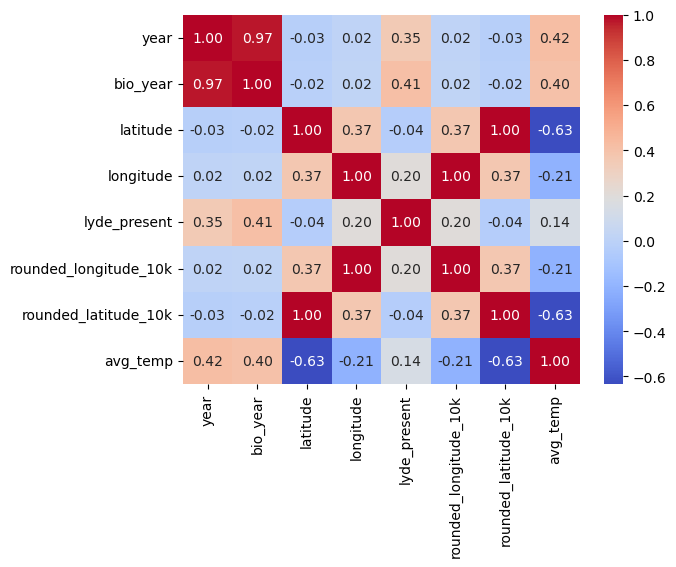

In [18]:
correlation_matrix = lyde.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Data Preprocessing


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Removing unique identifiers of the Lanternfly

In [20]:
lyde = lyde.drop("pointID", axis = 1)

### Identifying and Imputing the Null Variables.

In [21]:
lyde.isnull().sum()

source                       0
survey                       0
year                         0
bio_year                     0
latitude                     0
longitude                    0
state                        0
lyde_present                 0
lyde_established         78341
lyde_density             79773
source_agency                0
collection_method            0
rounded_longitude_10k        0
rounded_latitude_10k         0
avg_temp                     0
dtype: int64

In [22]:
lyde['lyde_established'].fillna(lyde['lyde_established'].mode()[0], inplace=True)
lyde['lyde_density'].fillna(lyde['lyde_density'].mode()[0], inplace=True)

In [23]:
lyde.isnull().sum()

source                   0
survey                   0
year                     0
bio_year                 0
latitude                 0
longitude                0
state                    0
lyde_present             0
lyde_established         0
lyde_density             0
source_agency            0
collection_method        0
rounded_longitude_10k    0
rounded_latitude_10k     0
avg_temp                 0
dtype: int64

### Creating a New Dataframe with One-hot encoding for categorical variables.

In [24]:
lyde_1 = lyde
lyde_1 = lyde_1.drop('lyde_density', axis=1)
lyde_1 = pd.get_dummies(lyde_1)

### Label encoding the ordinal target variable

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encoding the 'lyde_density' column
lyde['lyde_density'] = label_encoder.fit_transform(lyde['lyde_density'])

# Defining a custom mapping of labels to reverse the order
custom_label_mapping = {
    0: 3,
    1: 2,
    2: 1,
    3: 0
}
lyde['lyde_density'] = lyde['lyde_density'].map(custom_label_mapping)
print(lyde['lyde_density'].value_counts())


0    503198
2     91083
1     52867
3     11242
Name: lyde_density, dtype: int64


### PCA transformation on the data

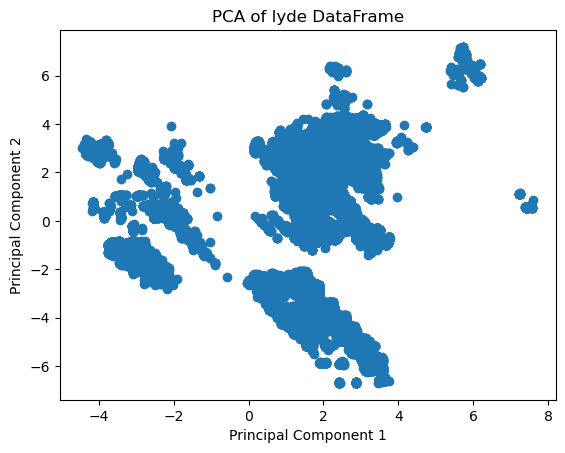

In [26]:

scaler = StandardScaler()
lyde_std = scaler.fit_transform(lyde_1)
pca = PCA(n_components=2)
lyde_pca = pca.fit_transform(lyde_std)

# Visualizing the results
plt.scatter(lyde_pca[:, 0], lyde_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of lyde DataFrame')
plt.show()


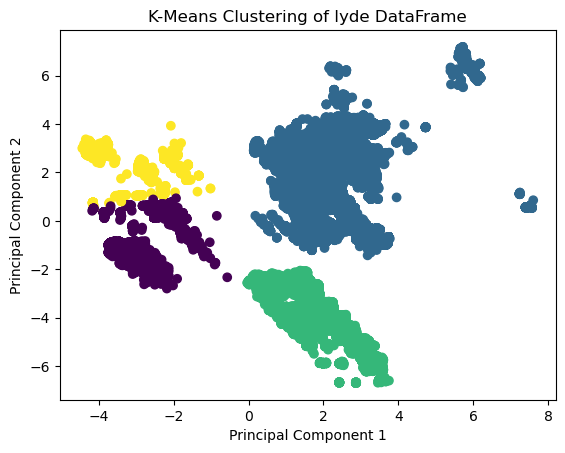

In [27]:
from sklearn.cluster import KMeans
num_clusters = 4

# Appling K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(lyde_pca)


# Visualizing the clusters in the PCA space
plt.scatter(lyde_pca[:, 0], lyde_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of lyde DataFrame')
plt.show()


In [28]:
from sklearn.feature_selection import SelectKBest, f_classif
target_variable = lyde['lyde_density']

# Selecting top k features based on ANOVA F-statistic
k_best = SelectKBest(f_classif, k=10)  
lyde_selected = k_best.fit_transform(lyde_1, target_variable)


In [29]:
selected_feature_indices = k_best.get_support(indices=True)
selected_feature_names = lyde_1.columns[selected_feature_indices]
print("Selected Features:", selected_feature_names)


Selected Features: Index(['bio_year', 'lyde_present', 'lyde_established', 'source_prt',
       'source_usda', 'survey_PAPRT2021', 'source_agency_PDA_Public_reporting',
       'source_agency_USDA', 'collection_method_field_survey/management',
       'collection_method_individual_reporting'],
      dtype='object')


# Testing Various Models 

### Splitting the data <= 2020 for training and testing == 2021 

## Random Forest Classifier

In [30]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# # Step 1: Preparing Data
# train_data = lyde[lyde['year'] <= 2020]
# test_data = lyde[lyde['year'] == 2021]

# # Step 2: Preparing Features and Target Variable for Classification
# features_train = train_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_train = pd.get_dummies(features_train)
# target_train = train_data['lyde_density']

# features_test = test_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_test = pd.get_dummies(features_test)
# target_test = test_data['lyde_density']

# # Step 3: Training the Model
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(features_train, target_train)

# # Step 4: Validate the Model
# predictions_test = rf_classifier.predict(features_test)

# # Evaluate the performance
# accuracy_test = accuracy_score(target_test, predictions_test)
# conf_matrix_test = confusion_matrix(target_test, predictions_test)
# class_report_test = classification_report(target_test, predictions_test)

# print("Testing Accuracy:", accuracy_test)
# print("Confusion Matrix:")
# print(conf_matrix_test)
# print("Classification Report:")
# print(class_report_test)

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()


### Report of Random Forest Classifier

Testing Accuracy: 0.7647938736439055

Confusion Matrix:

[[119922    177    315    111]

 [    90   5425  10772   3063]

 [   146  18204  23822  10162]

 [    23    887   2121    635]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    120525
           1       0.22      0.28      0.25     19350
           2       0.64      0.46      0.53     52334
           3       0.05      0.17      0.07      3666

    accuracy                           0.76    195875

   macro avg       0.48      0.48      0.46    195875
   
weighted avg       0.81      0.76      0.78    195875

In [31]:
lyde['lyde_density'].value_counts()

0    503198
2     91083
1     52867
3     11242
Name: lyde_density, dtype: int64

## Gradient Boosting

In [32]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.model_selection import train_test_split

# Preparing Data
# train_data = lyde[lyde['year'] <= 2020]
# val_data = lyde[lyde['year'] == 2021]

# # Preparing Features and Target Variable for Classification
# features_train = train_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_train = pd.get_dummies(features_train)
# target_train = train_data['lyde_density']

# features_val = val_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_val = pd.get_dummies(features_val)
# target_val = val_data['lyde_density']

# # Training the Model
# X_train, X_val, y_train, y_val = train_test_split(features_train, target_train, test_size=0.2, random_state=42)

# # Instantiating GradientBoostingClassifier
# gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# # Fiting the model
# gb_classifier.fit(X_train, y_train)

# # Validating the Model
# predictions_val = gb_classifier.predict(features_val)

# # Evaluating the performance
# accuracy_val = accuracy_score(target_val, predictions_val)
# conf_matrix_val = confusion_matrix(target_val, predictions_val)
# class_report_val = classification_report(target_val, predictions_val)

# print("Validation Accuracy:", accuracy_val)
# print("Confusion Matrix:")
# print(conf_matrix_val)
# print("Classification Report:")
# print(class_report_val)

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

### Report of Gradient Boosting
Validation Accuracy: 0.8786368857689854

Confusion Matrix:

[[119921     35    569      0]

 [     0   1638  17712      0]

 [     0   1790  50544      0]

 [     0    352   3314      0]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    120525
           1       0.43      0.08      0.14     19350
           2       0.70      0.97      0.81     52334
           3       0.00      0.00      0.00      3666

    accuracy                           0.88    195875

   macro avg       0.53      0.51      0.49    195875
   
weighted avg       0.84      0.88      0.84    195875

### Gradient Boosting with k-fold cross validation

In [33]:
# from sklearn.model_selection import cross_val_score, StratifiedKFold

# # Preparing Data
# train_data = lyde[lyde['year'] <= 2020]
# val_data = lyde[lyde['year'] == 2021]

# # Preparing Features and Target Variable for Classification
# features_train = train_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_train = pd.get_dummies(features_train)
# target_train = train_data['lyde_density']

# features_val = val_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_val = pd.get_dummies(features_val)
# target_val = val_data['lyde_density']

# # Training the Model with Cross-Validation
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Instantiating GradientBoostingClassifier
# gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# # Performing cross-validation
# cv_scores = cross_val_score(gb_classifier, features_train, target_train, cv=kf, scoring='accuracy')

# # Display cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean CV Accuracy:", cv_scores.mean())

# # Validating the Model
# gb_classifier.fit(features_train, target_train)
# predictions_val = gb_classifier.predict(features_val)

# # Evaluating the performance
# accuracy_val = accuracy_score(target_val, predictions_val)
# conf_matrix_val = confusion_matrix(target_val, predictions_val)
# class_report_val = classification_report(target_val, predictions_val)

# print("\nValidation Accuracy (on holdout set):", accuracy_val)
# print("Confusion Matrix:")
# print(conf_matrix_val)
# print("Classification Report:")
# print(class_report_val)

# # Visualize the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()



### Report for Gradient Boosting with k-fold cross validation:

Cross-Validation Scores: [0.92723401 0.92499541 0.92601161 0.92678998 0.92653052]
Mean CV Accuracy: 0.9263123053069572

Validation Accuracy (on holdout set): 0.8785552010210593


Confusion Matrix:

[[119921     36    568      0]

 [     0   1700  17650      0]

 [     0   1868  50466      0]
 
 [     0    359   3307      0]]

 
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    120525
           1       0.43      0.09      0.15     19350
           2       0.70      0.96      0.81     52334
           3       0.00      0.00      0.00      3666

    accuracy                           0.88    195875

   macro avg       0.53      0.51      0.49    195875

weighted avg       0.84      0.88      0.85    195875

### Gradient Boosting with Cross validation and Oversampling

In [34]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import RandomOverSampler

# # Preparing Data
# train_data = lyde[lyde['year'] <= 2020]
# val_data = lyde[lyde['year'] == 2021]

# # Preparing Features and Target Variable for Classification
# features_train = train_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_train = pd.get_dummies(features_train)
# target_train = train_data['lyde_density']

# features_val = val_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_val = pd.get_dummies(features_val)
# target_val = val_data['lyde_density']

# # Training the Model with Cross-Validation and Oversampling
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Create a pipeline with oversampling
# pipeline = Pipeline([
#     ('oversampler', RandomOverSampler(random_state=42)),
#     ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))
# ])

# # Performing cross-validation
# cv_scores = cross_val_score(pipeline, features_train, target_train, cv=kf, scoring='accuracy')

# # Display cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean CV Accuracy:", cv_scores.mean())

# #  Validating the Model
# pipeline.fit(features_train, target_train)
# predictions_val = pipeline.predict(features_val)

# # Evaluating the performance
# accuracy_val = accuracy_score(target_val, predictions_val)
# conf_matrix_val = confusion_matrix(target_val, predictions_val)
# class_report_val = classification_report(target_val, predictions_val)

# print("\nValidation Accuracy (on holdout set):", accuracy_val)
# print("Confusion Matrix:")
# print(conf_matrix_val)
# print("Classification Report:")
# print(class_report_val)

# # Visualize the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()


### Report for Gradient Boosting with Cross validation and Oversampling:

Cross-Validation Scores: [0.89599144 0.89756867 0.89421736 0.89351466 0.89459573]

Mean CV Accuracy: 0.8951775743150062

Validation Accuracy (on holdout set): 0.8711320995532865

Confusion Matrix:

[[119921     19    551     34]

 [     0    722  16947   1681]

 [     0    723  49612   1999]

 [     0    172   3116    378]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    120525
           1       0.44      0.04      0.07     19350
           2       0.71      0.95      0.81     52334
           3       0.09      0.10      0.10      3666

    accuracy                           0.87    195875
   macro avg       0.56      0.52      0.49    195875
weighted avg       0.85      0.87      0.84    195875

## Ensemble Method using Random forest and Gradient boosting

In [35]:
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# #  Prepare Data
# train_data = lyde[lyde['year'] <= 2020]
# val_data = lyde[lyde['year'] == 2021]

# #  Prepare Features and Target Variable for Classification
# features_train = train_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_train = pd.get_dummies(features_train)
# target_train = train_data['lyde_density']

# features_val = val_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_val = pd.get_dummies(features_val)
# target_val = val_data['lyde_density']

# #  Train Multiple Models
# rf_classifier = RandomForestClassifier(random_state=42)
# gb_classifier = GradientBoostingClassifier(random_state=42)

# # Create an Ensemble of Models (Voting Classifier)
# ensemble_classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('gb', gb_classifier)], voting='hard')

# # Train the Ensemble Model
# ensemble_classifier.fit(features_train, target_train)

# #  Validate the Ensemble Model
# predictions_val = ensemble_classifier.predict(features_val)

# #  Evaluate the Performance
# accuracy_val = accuracy_score(target_val, predictions_val)
# conf_matrix_val = confusion_matrix(target_val, predictions_val)
# class_report_val = classification_report(target_val, predictions_val)

# print("Ensemble Model Validation Accuracy:", accuracy_val)
# print("Confusion Matrix:")
# print(conf_matrix_val)
# print("Classification Report:")
# print(class_report_val)


### Report for Ensemble Method using Random forest and Gradient boosting

Ensemble Model Validation Accuracy: 0.81285513720485

Confusion Matrix:

[[119922    193    410      0]

 [    90   6178  13082      0]

 [   146  19070  33118      0]

 [    23   1065   2578      0]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    120525
           1       0.23      0.32      0.27     19350
           2       0.67      0.63      0.65     52334
           3       0.00      0.00      0.00      3666

    accuracy                           0.81    195875

   macro avg       0.48      0.49      0.48    195875
   
weighted avg       0.82      0.81      0.81    195875

## GBoost Model (with Oversampling)

In [36]:
# from xgboost import XGBClassifier
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import train_test_split


# #  Prepare Data
# train_data = lyde[lyde['year'] <= 2020]
# val_data = lyde[lyde['year'] == 2021]

# #  Prepare Features and Target Variable for Classification
# features_train = train_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_train = pd.get_dummies(features_train)
# target_train = train_data['lyde_density']

# features_val = val_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_val = pd.get_dummies(features_val)
# target_val = val_data['lyde_density']

# # Apply Oversampling
# oversampler = RandomOverSampler(random_state=42)
# features_resampled, target_resampled = oversampler.fit_resample(features_train, target_train)

# # Train Gradient Boosting Model on Oversampled Data
# gb_classifier = GradientBoostingClassifier(random_state=42)
# gb_classifier.fit(features_resampled, target_resampled)

# #  Validate the Model
# predictions_val_gb = gb_classifier.predict(features_val)

# # Evaluate the Performance
# accuracy_val_gb = accuracy_score(target_val, predictions_val_gb)
# conf_matrix_val_gb = confusion_matrix(target_val, predictions_val_gb)
# class_report_val_gb = classification_report(target_val, predictions_val_gb)

# print("Gradient Boosting Model Validation Accuracy (with Oversampling):", accuracy_val_gb)
# print("Confusion Matrix:")
# print(conf_matrix_val_gb)
# print("Classification Report:")
# print(class_report_val_gb)


### Report for GBoost Model (with Oversampling)

Gradient Boosting Model Validation Accuracy (with Oversampling): 0.8711320995532865

Confusion Matrix:

[[119921     19    551     34]

 [     0    722  16947   1681]

 [     0    723  49612   1999]

 [     0    172   3116    378]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    120525
           1       0.44      0.04      0.07     19350
           2       0.71      0.95      0.81     52334
           3       0.09      0.10      0.10      3666

    accuracy                           0.87    195875
   macro avg       0.56      0.52      0.49    195875
weighted avg       0.85      0.87      0.84    195875

## Ensemble Model (RFC + XGB) (with Oversampling):

In [37]:
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from xgboost import XGBClassifier
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import train_test_split


# # Step 1: Prepare Data
# train_data = lyde[lyde['year'] <= 2020]
# val_data = lyde[lyde['year'] == 2021]

# # Step 2: Prepare Features and Target Variable for Classification
# features_train = train_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_train = pd.get_dummies(features_train)
# target_train = train_data['lyde_density']

# features_val = val_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_val = pd.get_dummies(features_val)
# target_val = val_data['lyde_density']

# # Step 3: Apply Oversampling
# oversampler = RandomOverSampler(random_state=42)
# features_resampled, target_resampled = oversampler.fit_resample(features_train, target_train)

# # Step 4: Train Random Forest and XGBoost Models on Oversampled Data
# rf_classifier = RandomForestClassifier(random_state=42)
# xgb_classifier = XGBClassifier(random_state=42)

# rf_classifier.fit(features_resampled, target_resampled)
# xgb_classifier.fit(features_resampled, target_resampled)

# # Step 5: Create an Ensemble of Models (Voting Classifier) and Fit
# ensemble_classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('xgb', xgb_classifier)], voting='hard')
# ensemble_classifier.fit(features_resampled, target_resampled)

# # Step 6: Validate the Ensemble Model
# predictions_val = ensemble_classifier.predict(features_val)

# # Step 7: Evaluate the Performance
# accuracy_val = accuracy_score(target_val, predictions_val)
# conf_matrix_val = confusion_matrix(target_val, predictions_val)
# class_report_val = classification_report(target_val, predictions_val)

# print("Ensemble Model (RFC + XGB) Validation Accuracy (with Oversampling):", accuracy_val)
# print("Confusion Matrix:")
# print(conf_matrix_val)
# print("Classification Report:")
# print(class_report_val)


### Report for Ensemble Model (RFC + XGB) (with Oversampling):

Ensemble Model (RFC + XGB) Validation Accuracy (with Oversampling): 0.7866241225271219

Confusion Matrix:

[[119924    204    344     53]

 [   221   5826  11433   1870]

 [   294  20075  27891   4074]

 [    50    994   2183    439]]
 
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120525
           1       0.21      0.30      0.25     19350
           2       0.67      0.53      0.59     52334
           3       0.07      0.12      0.09      3666

    accuracy                           0.79    195875
    
   macro avg       0.49      0.49      0.48    195875

weighted avg       0.81      0.79      0.80    195875

## Random Forest Model (with SMOTE):

In [38]:
# from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Prepare Data
# train_data = lyde[lyde['year'] <= 2020]
# val_data = lyde[lyde['year'] == 2021]

# # Prepare Features and Target Variable for Classification
# features_train = train_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_train = pd.get_dummies(features_train)
# target_train = train_data['lyde_density']

# features_val = val_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_val = pd.get_dummies(features_val)
# target_val = val_data['lyde_density']

# # Apply SMOTE
# smote = SMOTE(random_state=42)
# features_resampled, target_resampled = smote.fit_resample(features_train, target_train)

# # Train Random Forest Model on Resampled Data
# rf_classifier = RandomForestClassifier(random_state=42)
# rf_classifier.fit(features_resampled, target_resampled)

# #  Validate the Model
# predictions_val = rf_classifier.predict(features_val)

# # Evaluate the Performance
# accuracy_val = accuracy_score(target_val, predictions_val)
# conf_matrix_val = confusion_matrix(target_val, predictions_val)
# class_report_val = classification_report(target_val, predictions_val)

# print("Random Forest Model Validation Accuracy (with SMOTE):", accuracy_val)
# print("Confusion Matrix:")
# print(conf_matrix_val)
# print("Classification Report:")
# print(class_report_val)


### Report for Random Forest Model (with SMOTE):
Random Forest Model Validation Accuracy (with SMOTE): 0.7265603063178048

Confusion Matrix:

[[119925    152    243    205]

 [   219   4370   8326   6435]

 [   288  15022  16768  20256]

 [    50    715   1649   1252]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120525
           1       0.22      0.23      0.22     19350
           2       0.62      0.32      0.42     52334
           3       0.04      0.34      0.08      3666

    accuracy                           0.73    195875

   macro avg       0.47      0.47      0.43    195875
   
weighted avg       0.80      0.73      0.75    195875

## Random Forest Model (with Equal Proportions):

In [39]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import train_test_split
# import pandas as pd

# #  Prepare Data
# train_data = lyde[lyde['year'] <= 2020]
# val_data = lyde[lyde['year'] == 2021]

# # Prepare Features and Target Variable for Classification
# features_train = train_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_train = pd.get_dummies(features_train)
# target_train = train_data['lyde_density']

# features_val = val_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
# features_val = pd.get_dummies(features_val)
# target_val = val_data['lyde_density']

# # Calculate the desired proportion (e.g., 1.0)
# desired_proportion = 1.0

# #  Calculate the desired number of samples for each class
# desired_samples_per_class = {
#     label: int(desired_proportion * target_train.value_counts().max())
#     for label in target_train.unique()
# }

# # Apply SMOTE to Oversample Minority Classes
# smote = SMOTE(sampling_strategy=desired_samples_per_class)
# features_resampled, target_resampled = smote.fit_resample(features_train, target_train)

# # Apply Random Undersampling to Majority Class
# undersampler = RandomUnderSampler(sampling_strategy=desired_samples_per_class)
# features_final, target_final = undersampler.fit_resample(features_resampled, target_resampled)

# # Train Random Forest Model on Final Resampled Data
# rf_classifier = RandomForestClassifier(random_state=42)
# rf_classifier.fit(features_final, target_final)

# # Validate the Model
# predictions_val = rf_classifier.predict(features_val)

# #  Evaluate the Performance
# accuracy_val = accuracy_score(target_val, predictions_val)
# conf_matrix_val = confusion_matrix(target_val, predictions_val)
# class_report_val = classification_report(target_val, predictions_val)

# print("Random Forest Model Validation Accuracy (with Equal Proportions):", accuracy_val)
# print("Confusion Matrix:")
# print(conf_matrix_val)
# print("Classification Report:")
# print(class_report_val)


### Report for Random Forest Model (with Equal Proportions):

Random Forest Model Validation Accuracy (with Equal Proportions): 0.7344633056796426

Confusion Matrix:

[[119925    164    258    178]

 [   236   4656   8495   5963]

 [   309  17068  18070  16887]

 [    51    757   1646   1212]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120525
           1       0.21      0.24      0.22     19350
           2       0.63      0.35      0.45     52334
           3       0.05      0.33      0.09      3666

    accuracy                           0.73    195875

   macro avg       0.47      0.48      0.44    195875
   
weighted avg       0.80      0.73      0.76    195875

## Gradient Boosting without the most important feature 'lyde_established'

In [40]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.model_selection import train_test_split

# # Step 1: Preparing Data
# train_data = lyde[lyde['year'] <= 2020]
# val_data = lyde[lyde['year'] == 2021]

# # Step 2: Preparing Features and Target Variable for Classification
# features_train = train_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state','lyde_established'], axis=1)
# features_train = pd.get_dummies(features_train)
# target_train = train_data['lyde_density']

# features_val = val_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state','lyde_established'], axis=1)
# features_val = pd.get_dummies(features_val)
# target_val = val_data['lyde_density']

# # Step 3: Training the Model
# X_train, X_val, y_train, y_val = train_test_split(features_train, target_train, test_size=0.2, random_state=42)

# # Instantiating GradientBoostingClassifier
# gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# # Fiting the model
# gb_classifier.fit(X_train, y_train)

# # Step 4: Validating the Model
# predictions_val = gb_classifier.predict(features_val)

# # Evaluating the performance
# accuracy_val = accuracy_score(target_val, predictions_val)
# conf_matrix_val = confusion_matrix(target_val, predictions_val)
# class_report_val = classification_report(target_val, predictions_val)

# print("Validation Accuracy:", accuracy_val)
# print("Confusion Matrix:")
# print(conf_matrix_val)
# print("Classification Report:")
# print(class_report_val)

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

### Report of Gradient Boosting without the most important feature 'lyde_established'
Validation Accuracy: 0.6222795149968092

Confusion Matrix:

[[114148   1155   5222      0]

 [ 14307   1699   3344      0]

 [ 44336   1956   6042      0]

 [  2431    380    855      0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.95      0.77    120525
           1       0.33      0.09      0.14     19350
           2       0.39      0.12      0.18     52334
           3       0.00      0.00      0.00      3666

    accuracy                           0.62    195875

   macro avg       0.34      0.29      0.27    195875
   
weighted avg       0.54      0.62      0.54    195875

# Model With Best Accuracy: Gradient Boosting Classifier

Validation Accuracy: 0.8786368857689854
Confusion Matrix:
[[119921     35    569      0]
 [     0   1638  17712      0]
 [     0   1790  50544      0]
 [     0    352   3314      0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    120525
           1       0.43      0.08      0.14     19350
           2       0.70      0.97      0.81     52334
           3       0.00      0.00      0.00      3666

    accuracy                           0.88    195875
   macro avg       0.53      0.51      0.49    195875
weighted avg       0.84      0.88      0.84    195875



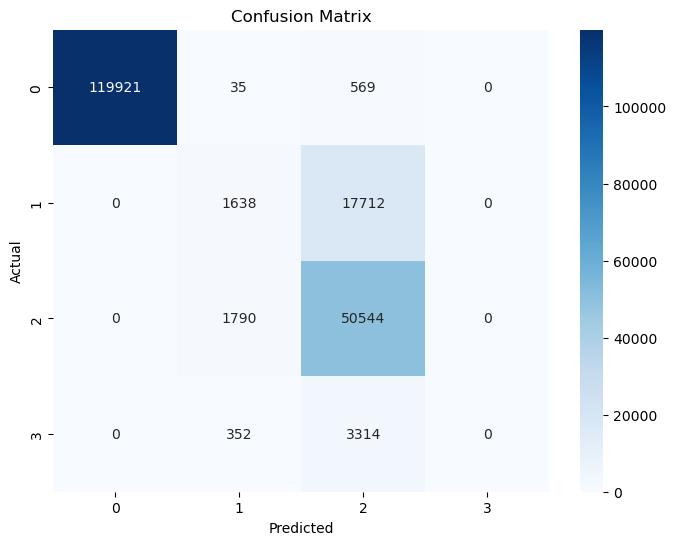

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Preparing Data
train_data = lyde[lyde['year'] <= 2020]
val_data = lyde[lyde['year'] == 2021]

#  Preparing Features and Target Variable for Classification
features_train = train_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
features_train = pd.get_dummies(features_train)
target_train = train_data['lyde_density']

features_val = val_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
features_val = pd.get_dummies(features_val)
target_val = val_data['lyde_density']

#  Training the Model
X_train, X_val, y_train, y_val = train_test_split(features_train, target_train, test_size=0.2, random_state=42)

# Instantiating GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fiting the model
gb_classifier.fit(X_train, y_train)

# Validating the Model
predictions_val = gb_classifier.predict(features_val)

# the performance
accuracy_val = accuracy_score(target_val, predictions_val)
conf_matrix_val = confusion_matrix(target_val, predictions_val)
class_report_val = classification_report(target_val, predictions_val)

print("Validation Accuracy:", accuracy_val)
print("Confusion Matrix:")
print(conf_matrix_val)
print("Classification Report:")
print(class_report_val)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

#  Preparing Data
train_data = lyde[lyde['year'] <= 2020]
val_data = lyde[lyde['year'] == 2021]

# Preparing Features and Target Variable for Classification
features_train = train_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
features_train = pd.get_dummies(features_train)
target_train = train_data['lyde_density']

features_val = val_data.drop(['lyde_density', 'year', 'source_agency', 'survey', 'state'], axis=1)
features_val = pd.get_dummies(features_val)
target_val = val_data['lyde_density']

# Applying Oversampling
oversampler = RandomOverSampler(random_state=42)
features_resampled, target_resampled = oversampler.fit_resample(features_train, target_train)

# Training Gradient Boosting Model on Oversampled Data
gb_classifierOS = GradientBoostingClassifier(random_state=42)
gb_classifierOS.fit(features_resampled, target_resampled)

#  Validate the Model
predictions_val_gb = gb_classifierOS.predict(features_val)

# Evaluating the Performance
accuracy_val_gb = accuracy_score(target_val, predictions_val_gb)
conf_matrix_val_gb = confusion_matrix(target_val, predictions_val_gb)
class_report_val_gb = classification_report(target_val, predictions_val_gb)

print("Gradient Boosting Model Validation Accuracy (with Oversampling):", accuracy_val_gb)
print("Confusion Matrix:")
print(conf_matrix_val_gb)
print("Classification Report:")
print(class_report_val_gb)


Gradient Boosting Model Validation Accuracy (with Oversampling): 0.8711320995532865
Confusion Matrix:
[[119921     19    551     34]
 [     0    722  16947   1681]
 [     0    723  49612   1999]
 [     0    172   3116    378]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    120525
           1       0.44      0.04      0.07     19350
           2       0.71      0.95      0.81     52334
           3       0.09      0.10      0.10      3666

    accuracy                           0.87    195875
   macro avg       0.56      0.52      0.49    195875
weighted avg       0.85      0.87      0.84    195875



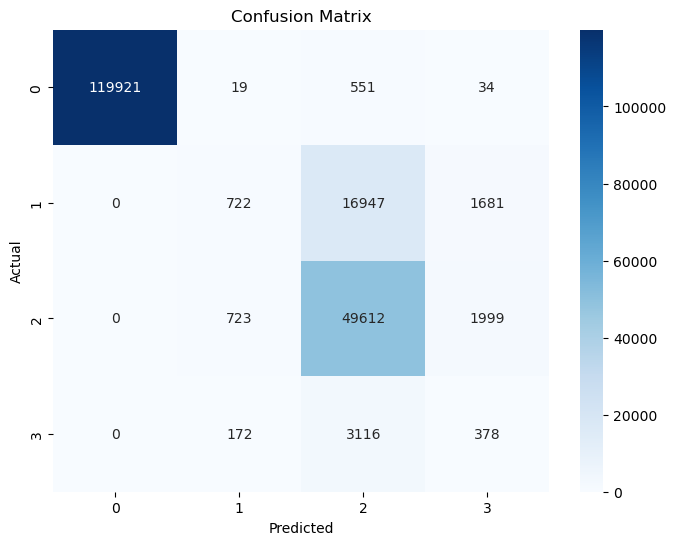

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_gb, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

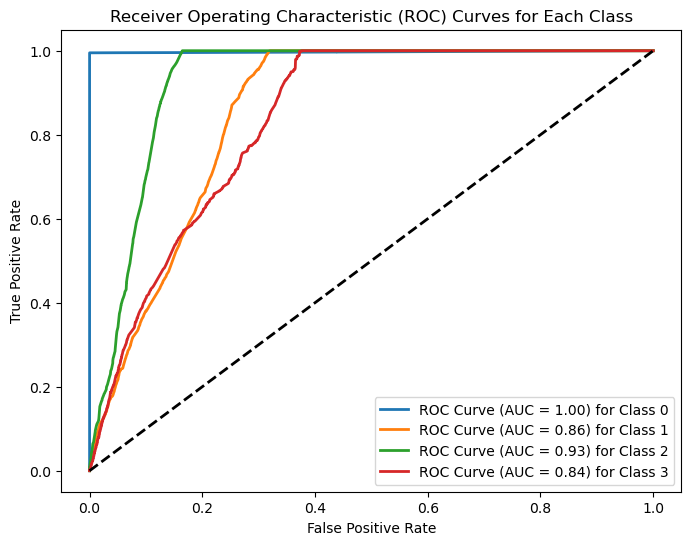

In [44]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score



#  ROC Curve and AUC for each class
y_probs = gb_classifierOS.predict_proba(features_val)
n_classes = len(gb_classifierOS.classes_)
y_test_bin = label_binarize(target_val, classes=np.arange(n_classes))

# Initializing arrays to store fpr, tpr, and roc_auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC Curve (AUC = {roc_auc[i]:.2f}) for Class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.legend(loc='lower right')
plt.show()


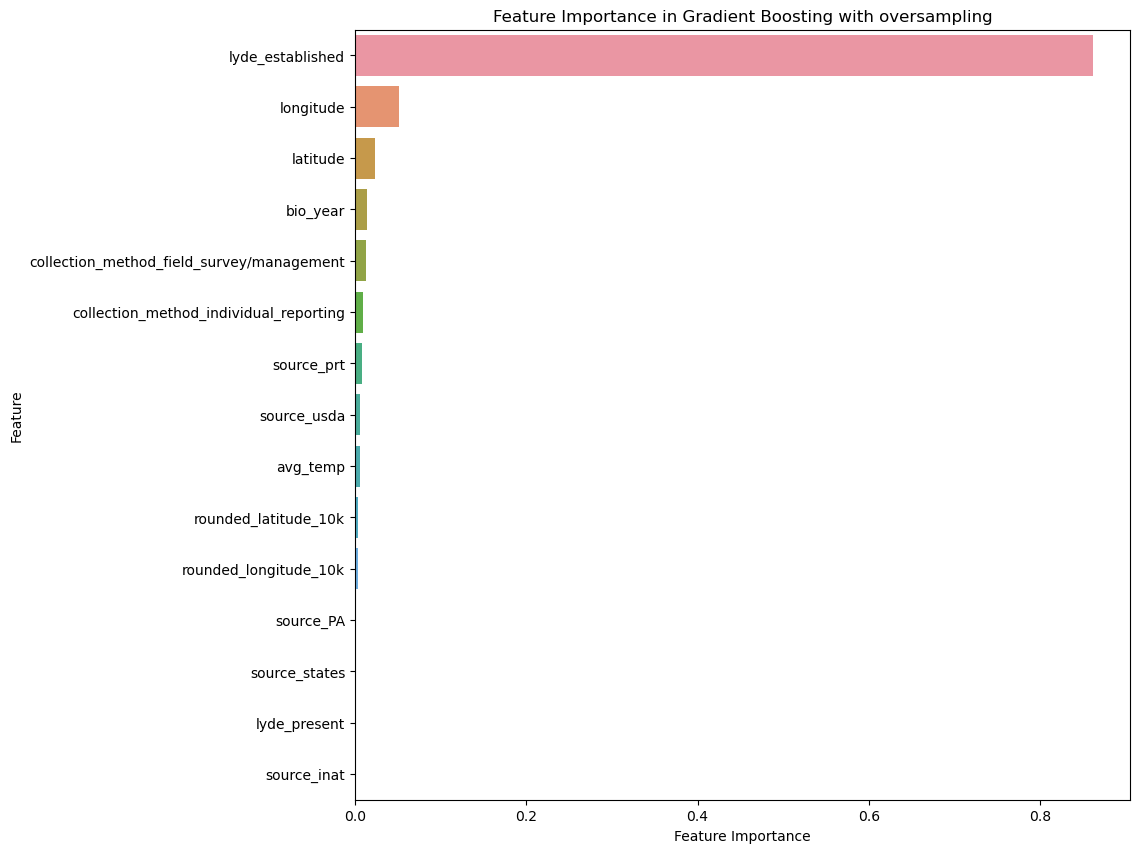

In [45]:
#feature importances from the trained model
importances = gb_classifierOS.feature_importances_

#  a bar plot to visualize feature importance
importances_df = pd.DataFrame({'Feature': features_train.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Gradient Boosting with oversampling')
plt.show()

In [46]:
features_train.head()

,bio_year,latitude,longitude,lyde_present,lyde_established,rounded_longitude_10k,rounded_latitude_10k,avg_temp,source_PA,source_inat,source_prt,source_states,source_usda,collection_method_field_survey/management,collection_method_individual_reporting
0,2015,40.414414,-75.658824,True,False,-75.647059,40.45045,49.5,0,1,0,0,0,0,1
1,2016,40.333333,-75.635294,True,False,-75.647059,40.36036,50.9,0,1,0,0,0,0,1
2,2016,40.360360,-75.482353,True,False,-75.529412,40.36036,50.9,0,1,0,0,0,0,1
3,2016,40.369369,-75.623529,True,False,-75.647059,40.36036,50.9,0,1,0,0,0,0,1
4,2016,40.378378,-75.717647,True,False,-75.764706,40.36036,50.9,0,1,0,0,0,0,1


### Creating a Prediction set

### Predicting the average temperatures of the states for 2030

In [47]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

train_data = lyde[(lyde['state'] == 'OH') ]
predict_data = lyde[(lyde['state'] == 'OH') ]

# Features and target variable
X = train_data[['year']]
y = train_data['avg_temp']

# Performing a 70-30 split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear regression model
model = Pipeline(steps=[
    ('regressor', LinearRegression())
])

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the validation set
predictions_val = model.predict(X_val)


# Making predictions for the year 2030
X_predict_2030 = pd.DataFrame({'year': [2030]}) 
predicted_avg_temp_2030 = model.predict(X_predict_2030)

print("Predicted Average Temperature for OH in 2030:", predicted_avg_temp_2030[0])

Predicted Average Temperature for OH in 2030: 55.0


In [48]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

train_data = lyde[(lyde['state'] == 'KY') ]
predict_data = lyde[(lyde['state'] == 'KY') ]

# Features and target variable
X = train_data[['year']]
y = train_data['avg_temp']

# Performing a 70-30 split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear regression model
model = Pipeline(steps=[
    ('regressor', LinearRegression())
])

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the validation set
predictions_val = model.predict(X_val)


# Making predictions for the year 2030
X_predict_2030 = pd.DataFrame({'year': [2030]}) 
predicted_avg_temp_2030 = model.predict(X_predict_2030)

print("Predicted Average Temperature for KY in 2030:", predicted_avg_temp_2030[0])

Predicted Average Temperature for KY in 2030: 54.74999999999994


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

train_data = lyde[(lyde['state'] == 'NC') ]
predict_data = lyde[(lyde['state'] == 'NC') ]

# Features and target variable
X = train_data[['year']]
y = train_data['avg_temp']

# Performing a 70-30 split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear regression model
model = Pipeline(steps=[
    ('regressor', LinearRegression())
])

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the validation set
predictions_val = model.predict(X_val)


# Making predictions for the year 2030
X_predict_2030 = pd.DataFrame({'year': [2030]})  
predicted_avg_temp_2030 = model.predict(X_predict_2030)

print("Predicted Average Temperature for NC in 2030:", predicted_avg_temp_2030[0])

Predicted Average Temperature for NC in 2030: 55.25912081830734


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

train_data = lyde[(lyde['state'] == 'KS')]
predict_data = lyde[(lyde['state'] == 'KS')]

# Features and target variable
X = train_data[['year']]
y = train_data['avg_temp']

# Performing a 70-30 split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear regression model
model = Pipeline(steps=[
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

# Make predictions on the validation set
predictions_val = model.predict(X_val)


# Making predictions for the year 2030
X_predict_2030 = pd.DataFrame({'year': [2030]})  # Assuming '0' is a placeholder for avg_temp
predicted_avg_temp_2030 = model.predict(X_predict_2030)

print("Predicted Average Temperature for KS in 2030:", predicted_avg_temp_2030[0])


Predicted Average Temperature for KS in 2030: 56.10000000000001


# Populating the Prediction sheet

In [53]:
prediction = pd.read_excel('prediction/prediction1.xlsx')


In [54]:
predictions = gb_classifierOS.predict(prediction)

In [55]:
predictions

array([2, 2, 2, 0, 2])

In [56]:
prediction.head()

,bio_year,latitude,longitude,lyde_present,lyde_established,rounded_longitude_10k,rounded_latitude_10k,avg_temp,source_PA,source_inat,source_prt,source_states,source_usda,collection_method_field_survey/management,collection_method_individual_reporting
0,2032,40.417,-82.91,True,True,40.417,-82.91,55.00,1,0,0,0,0,1,0
1,2033,37.840,-84.27,True,True,37.840,-84.27,54.75,0,0,0,1,0,0,1
2,2033,35.760,-80.79,True,True,35.760,-80.79,55.26,0,0,1,0,0,1,0
3,2032,36.780,119.42,True,False,36.780,119.42,73.00,0,1,0,0,0,0,1
4,2033,39.010,-98.48,True,True,39.010,-98.48,56.10,0,0,1,0,0,0,1


In [57]:
prediction['lyde_density'] = predictions

In [58]:
prediction['lyde_density_category'] = prediction['lyde_density'].map({0: 'Unpopulated', 1: 'Low', 2: 'Medium', 3: 'High'})

In [59]:
prediction.head()

,bio_year,latitude,longitude,lyde_present,lyde_established,rounded_longitude_10k,rounded_latitude_10k,avg_temp,source_PA,source_inat,source_prt,source_states,source_usda,collection_method_field_survey/management,collection_method_individual_reporting,lyde_density,lyde_density_category
0,2032,40.417,-82.91,True,True,40.417,-82.91,55.00,1,0,0,0,0,1,0,2,Medium
1,2033,37.840,-84.27,True,True,37.840,-84.27,54.75,0,0,0,1,0,0,1,2,Medium
2,2033,35.760,-80.79,True,True,35.760,-80.79,55.26,0,0,1,0,0,1,0,2,Medium
3,2032,36.780,119.42,True,False,36.780,119.42,73.00,0,1,0,0,0,0,1,0,Unpopulated
4,2033,39.010,-98.48,True,True,39.010,-98.48,56.10,0,0,1,0,0,0,1,2,Medium


In [60]:
prediction.to_excel('prediction/predictiongbOS.xlsx', sheet_name='Prediction', index=False)


# Running a 70-30 split model on the entire dataset

## Base Model (Logistic Regression)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Prepare the data
features = [ 'bio_year', 'latitude', 'longitude'
       , 'lyde_present', 'lyde_established',
     'avg_temp']
target = 'lyde_density'

X = lyde[features]
X = pd.get_dummies(X)
y = lyde[target] 
X.head()

,bio_year,latitude,longitude,lyde_present,lyde_established,avg_temp
0,2015,40.414414,-75.658824,True,False,49.5
1,2016,40.333333,-75.635294,True,False,50.9
2,2016,40.360360,-75.482353,True,False,50.9
3,2016,40.369369,-75.623529,True,False,50.9
4,2016,40.378378,-75.717647,True,False,50.9


In [62]:
# Splitting  data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Splitting into training (70%) and temp (30%)

# logistic Regression
logistic_regression = LogisticRegression()

# Training the model on the training set
logistic_regression.fit(X_train, y_train)

# Evaluating the model on the validation set
y_val_pred = logistic_regression.predict(X_train)
validation_accuracy = accuracy_score(y_train, y_val_pred)
print(f"Training Accuracy: {validation_accuracy:.2f}")


y_test_pred = logistic_regression.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Getting additional classification metrics
print("\nClassification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))

# Getting confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Testing Set:")
print(confusion_matrix_result)


Training Accuracy: 0.88
Testing Accuracy: 0.88

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    151209
           1       0.27      0.13      0.18     15732
           2       0.55      0.75      0.64     27265
           3       0.00      0.00      0.00      3311

    accuracy                           0.88    197517
   macro avg       0.45      0.47      0.45    197517
weighted avg       0.85      0.88      0.86    197517


Confusion Matrix for Testing Set:
[[150810     59    340      0]
 [   237   2113  13382      0]
 [  1338   5357  20570      0]
 [    66    417   2828      0]]


## Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Splitting into initial training (70%) and test (30%)

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  

random_forest_classifier.fit(X_train, y_train)

y_train_pred = random_forest_classifier.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy:.2f}")

y_test_pred = random_forest_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

print("\nClassification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))

confusion_matrix_result = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Testing Set:")
print(confusion_matrix_result)

cv_scores = cross_val_score(random_forest_classifier, X_train, y_train, cv=5)  
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Training Accuracy: 0.94
Testing Accuracy: 0.91

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    151209
           1       0.49      0.50      0.50     15732
           2       0.70      0.76      0.73     27265
           3       0.23      0.08      0.11      3311

    accuracy                           0.91    197517
   macro avg       0.60      0.58      0.58    197517
weighted avg       0.90      0.91      0.91    197517


Confusion Matrix for Testing Set:
[[150818    163    219      9]
 [    26   7837   7413    456]
 [    44   6099  20736    386]
 [     3   1751   1307    250]]
Cross-Validation Scores: [0.90660157 0.90700298 0.90596149 0.90765292 0.9072515 ]
Mean CV Score: 0.9068940925509519


## Predicting using Random Forest Classifier

In [68]:
predictionrf = pd.read_excel('prediction/prediction2.xlsx')

In [69]:
predictionsRF = random_forest_classifier.predict(predictionrf)

In [70]:
predictionsRF 

array([2, 2, 2, 0, 2])

In [71]:

predictionrf['lyde_density'] = predictionsRF
predictionrf['lyde_density_category'] = predictionrf['lyde_density'].map({0: 'Unpopulated', 1: 'Low', 2: 'Medium', 3: 'High'})

In [72]:
predictionrf.to_excel('prediction/predictionrf.xlsx', sheet_name='Prediction', index=False)

## Random Forest with Over-Sampling

In [73]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler


# Splitting into initial training (70%) and test (30%) without oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying oversampling to the training set
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize and train the RandomForestClassifier on the resampled training set
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_resampled, y_train_resampled)

# Predictions on the original test set
y_test_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
training_accuracy = accuracy_score(y_train_resampled, random_forest_classifier.predict(X_train_resampled))
testing_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy (after oversampling): {training_accuracy:.2f}")
print(f"Testing Accuracy: {testing_accuracy:.2f}")

print("\nClassification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))

confusion_matrix_result = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Testing Set:")

print(confusion_matrix_result)


Training Accuracy (after oversampling): 0.78
Testing Accuracy: 0.89

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    151209
           1       0.45      0.42      0.43     15732
           2       0.75      0.59      0.66     27265
           3       0.13      0.41      0.20      3311

    accuracy                           0.89    197517
   macro avg       0.58      0.60      0.57    197517
weighted avg       0.91      0.89      0.89    197517


Confusion Matrix for Testing Set:
[[150816    141    159     93]
 [    19   6552   4393   4768]
 [    24   6731  16176   4334]
 [     1   1236    712   1362]]


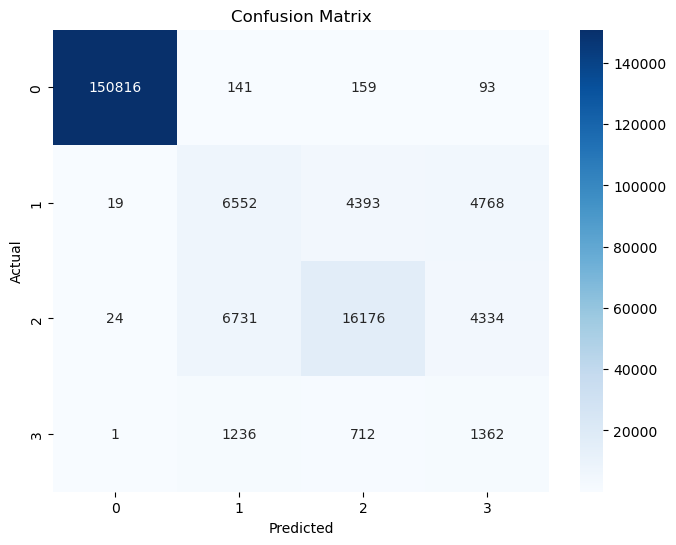

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [78]:
predictionrfos = pd.read_excel('prediction/prediction2.xlsx')
predictionsRFos = random_forest_classifier.predict(predictionrfos)

In [79]:
predictionsRFos 

array([2, 2, 2, 0, 2])

In [80]:
predictionrf.to_excel('prediction/predictionrfOS.xlsx', sheet_name='Prediction', index=False)

### SAME PREDICTIONS FOR ALL THREE BEST PERFORMING MODELS 
array([2, 2, 2, 0, 2]);

where 2: MEDIUM, 0: Unpopulated